# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atafu village
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | dryden
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | talara
Processing Record 7 of Set 1 | fockbek
Processing Record 8 of Set 1 | petropavlovsk-kamchatsky
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | pesqueira
Processing Record 11 of Set 1 | nizhniy odes
Processing Record 12 of Set 1 | selfoss
Processing Record 13 of Set 1 | miquelon
Processing Record 14 of Set 1 | bel ombre
Processing Record 15 of Set 1 | iskateley
Processing Record 16 of Set 1 | mancora
Processing Record 17 of Set 1 | namibe
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 21 of Set 1 | talnakh
Processing Record 22 of Set 1 | 

Processing Record 39 of Set 4 | plastun
Processing Record 40 of Set 4 | tranovaho
City not found. Skipping...
Processing Record 41 of Set 4 | wulingyuan
Processing Record 42 of Set 4 | wafangdian
Processing Record 43 of Set 4 | west island
Processing Record 44 of Set 4 | ar ruways
Processing Record 45 of Set 4 | dunedin
Processing Record 46 of Set 4 | littlefield
Processing Record 47 of Set 4 | cileungsir
Processing Record 48 of Set 4 | castanos
Processing Record 49 of Set 4 | mossel bay
Processing Record 0 of Set 5 | alice springs
Processing Record 1 of Set 5 | arraial do cabo
Processing Record 2 of Set 5 | sinabang
Processing Record 3 of Set 5 | puerto deseado
Processing Record 4 of Set 5 | nemuro
Processing Record 5 of Set 5 | acarau
Processing Record 6 of Set 5 | xudat
Processing Record 7 of Set 5 | fada
Processing Record 8 of Set 5 | tindouf
Processing Record 9 of Set 5 | glace bay
Processing Record 10 of Set 5 | repatriacion
Processing Record 11 of Set 5 | dalbandin
Processing Re

Processing Record 34 of Set 8 | flin flon
Processing Record 35 of Set 8 | mukah
City not found. Skipping...
Processing Record 36 of Set 8 | mccook
Processing Record 37 of Set 8 | guozhen
Processing Record 38 of Set 8 | bengkulu
Processing Record 39 of Set 8 | touros
Processing Record 40 of Set 8 | jatibonico
Processing Record 41 of Set 8 | takamaka
City not found. Skipping...
Processing Record 42 of Set 8 | uliastay
Processing Record 43 of Set 8 | patong
Processing Record 44 of Set 8 | bezhetsk
Processing Record 45 of Set 8 | colonia
Processing Record 46 of Set 8 | sisimiut
Processing Record 47 of Set 8 | hilo
Processing Record 48 of Set 8 | kutum
Processing Record 49 of Set 8 | madison
Processing Record 0 of Set 9 | jatai
Processing Record 1 of Set 9 | kayangel
Processing Record 2 of Set 9 | arkhangel'sk
Processing Record 3 of Set 9 | kailua-kona
Processing Record 4 of Set 9 | vigan
Processing Record 5 of Set 9 | broome
Processing Record 6 of Set 9 | sandnessjoen
Processing Record 7 o

Processing Record 20 of Set 12 | rio gallegos
Processing Record 21 of Set 12 | puerto san carlos
City not found. Skipping...
Processing Record 22 of Set 12 | talachyn
Processing Record 23 of Set 12 | bridgewater
Processing Record 24 of Set 12 | barcelos
Processing Record 25 of Set 12 | halifax
Processing Record 26 of Set 12 | tisaiyanvilai
Processing Record 27 of Set 12 | saint-christol-les-ales
Processing Record 28 of Set 12 | tanjung selor
City not found. Skipping...
Processing Record 29 of Set 12 | astorga
Processing Record 30 of Set 12 | vrangel'
Processing Record 31 of Set 12 | coahuayana de hidalgo
Processing Record 32 of Set 12 | ardestan
Processing Record 33 of Set 12 | kokologo
Processing Record 34 of Set 12 | fort st. john
Processing Record 35 of Set 12 | kerema
Processing Record 36 of Set 12 | kaoma
Processing Record 37 of Set 12 | upington
Processing Record 38 of Set 12 | greymouth
Processing Record 39 of Set 12 | uttaradit
Processing Record 40 of Set 12 | haiku-pauwela
Pro

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atafu village,-8.5421,-172.5159,28.46,72,42,4.85,TK,1685060870
1,bilibino,68.0546,166.4372,9.64,44,93,0.70,RU,1685060873
2,dryden,49.7833,-92.7503,24.16,29,0,6.17,CA,1685060777
3,ribeira grande,38.5167,-28.7000,17.65,80,59,4.47,PT,1685061047
4,bredasdorp,-34.5322,20.0403,9.22,81,25,4.17,ZA,1685061052


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atafu village,-8.5421,-172.5159,28.46,72,42,4.85,TK,1685060870
1,bilibino,68.0546,166.4372,9.64,44,93,0.70,RU,1685060873
2,dryden,49.7833,-92.7503,24.16,29,0,6.17,CA,1685060777
3,ribeira grande,38.5167,-28.7000,17.65,80,59,4.47,PT,1685061047
4,bredasdorp,-34.5322,20.0403,9.22,81,25,4.17,ZA,1685061052


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

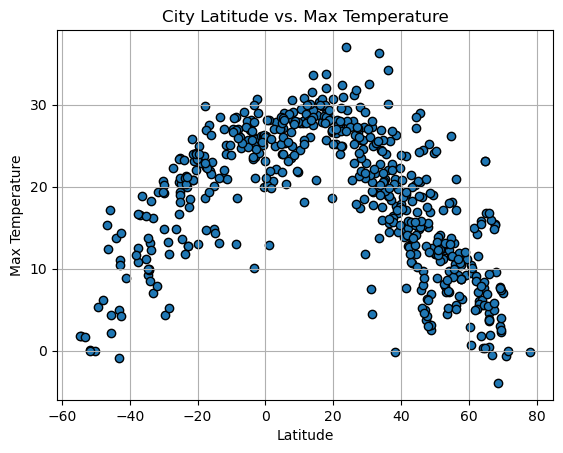

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors = 'black')

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

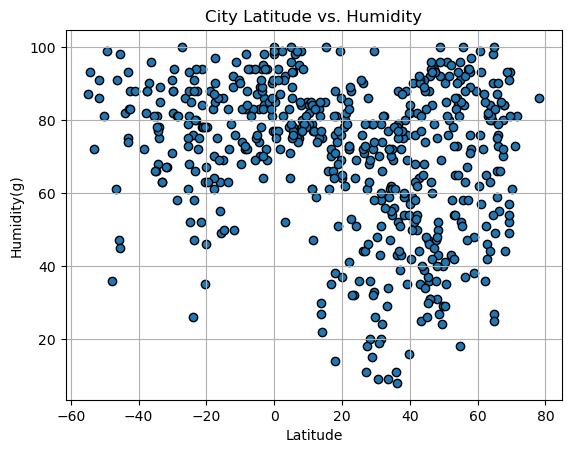

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors = 'black')

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity(g)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

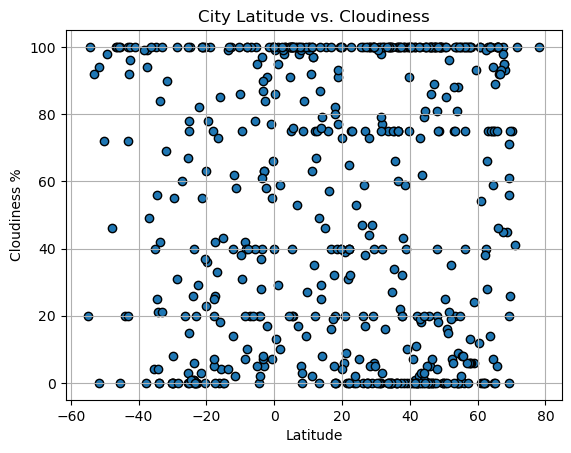

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors = 'black')

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

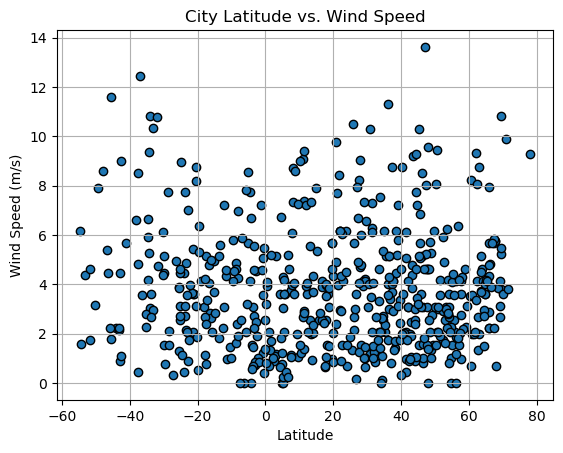

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors = 'black')

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def lineplot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.xlabel("Latitude")
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(0,intercept+1),fontsize=15,color="red")
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bilibino,68.0546,166.4372,9.64,44,93,0.70,RU,1685060873
2,dryden,49.7833,-92.7503,24.16,29,0,6.17,CA,1685060777
3,ribeira grande,38.5167,-28.7000,17.65,80,59,4.47,PT,1685061047
6,fockbek,54.3000,9.6000,7.12,84,0,3.60,DE,1685061052
7,petropavlovsk-kamchatsky,53.0452,158.6483,12.33,54,75,3.00,RU,1685061047


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atafu village,-8.5421,-172.5159,28.46,72,42,4.85,TK,1685060870
4,bredasdorp,-34.5322,20.0403,9.22,81,25,4.17,ZA,1685061052
5,talara,-4.5772,-81.2719,25.42,83,0,7.72,PE,1685061052
8,grytviken,-54.2811,-36.5092,1.76,93,100,1.57,GS,1685061052
9,pesqueira,-8.3578,-36.6964,18.57,98,40,2.39,BR,1685061052


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.6220644135433777


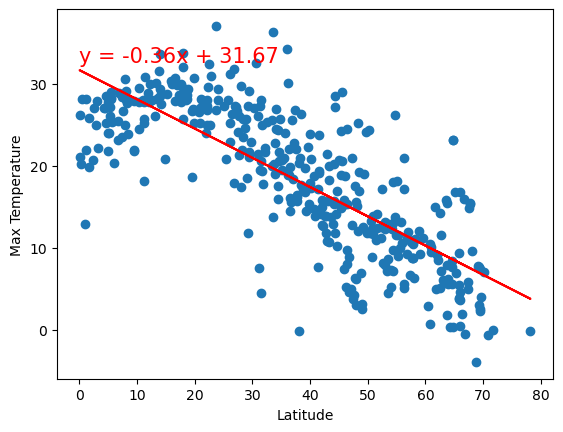

In [15]:
# Linear regression on Northern Hemisphere
plt.ylabel("Max Temperature")
lineplot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

The r-squared is: 0.6692311267833223


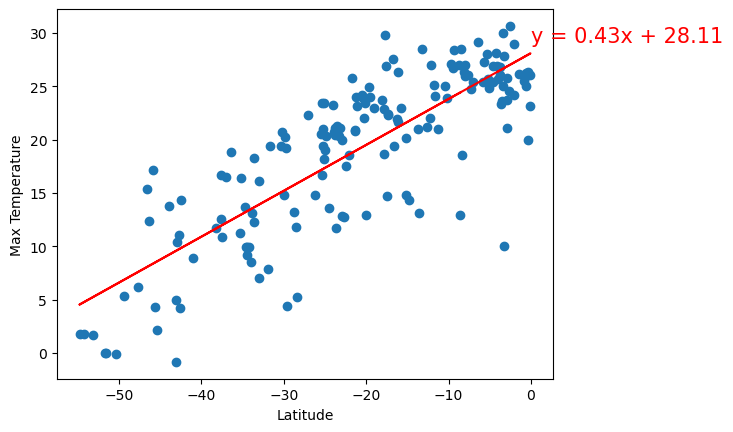

In [16]:
# Linear regression on Southern Hemisphere
plt.ylabel("Max Temperature")
lineplot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

**Discussion about the linear relationship:** There is a negative correlation in the first graph where the further a latitude is from the equator, themax temperature tends to be lower. There is a positive correllation in the second graph where the closer the latitude gets to the equator, the max temperature tends to be higher.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.006930839503578024


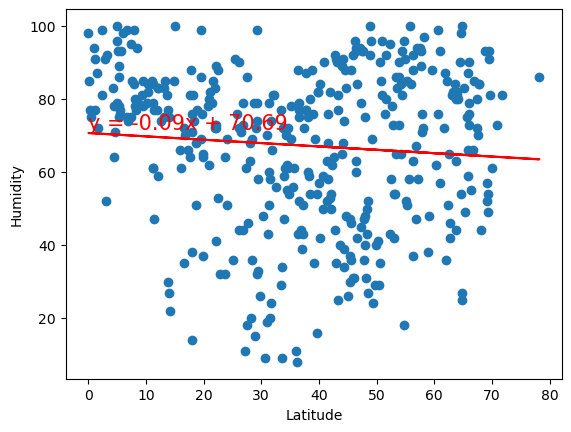

In [17]:
# Northern Hemisphere
plt.ylabel("Humidity")
lineplot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

The r-squared is: 0.012548317996958852


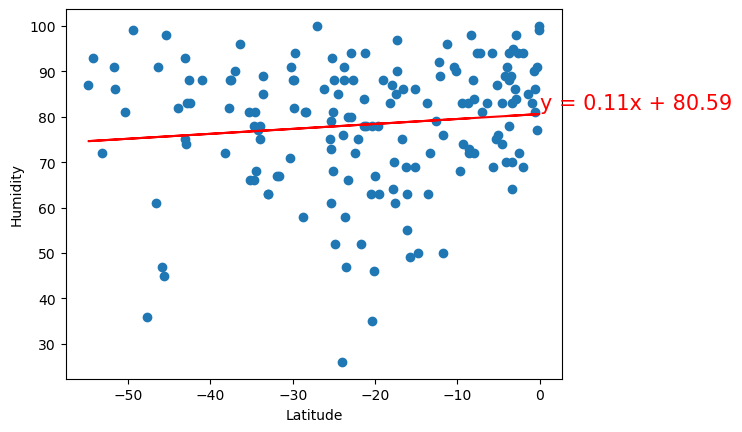

In [18]:
# Southern Hemisphere
plt.ylabel("Humidity")
lineplot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

**Discussion about the linear relationship:** There doesn't appear to be any correlation in either graph.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0025236063079394416


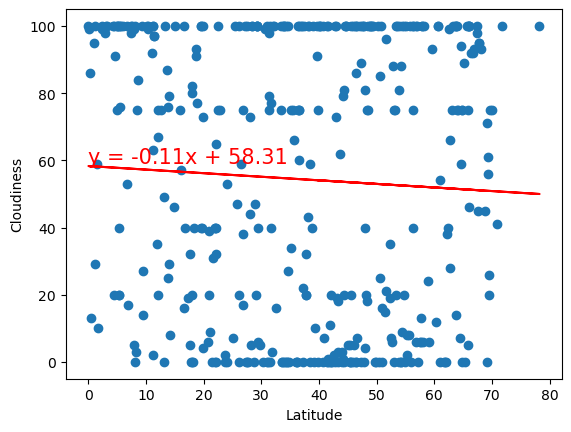

In [19]:
# Northern Hemisphere
plt.ylabel("Cloudiness")
lineplot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

The r-squared is: 0.006039118128383005


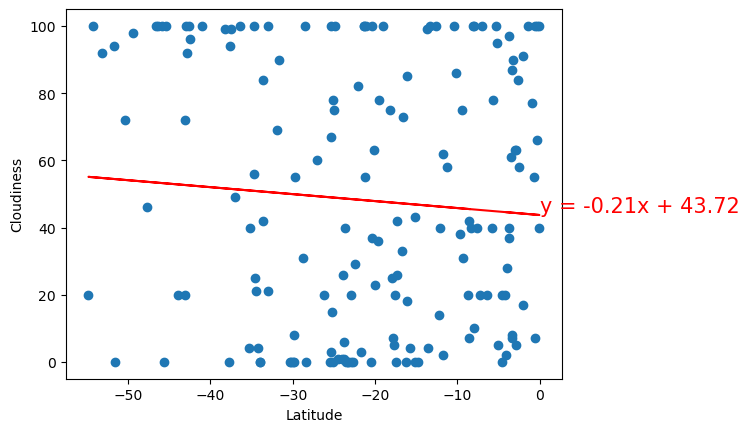

In [20]:
# Southern Hemisphere
plt.ylabel("Cloudiness")
lineplot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

**Discussion about the linear relationship:** There doesn't appear to be any correlation in either graph.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.006411290292345147


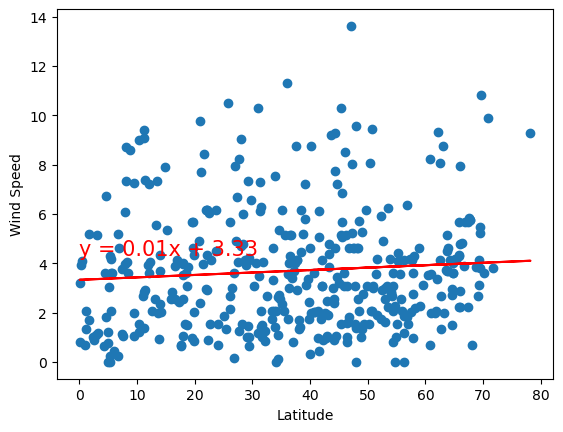

In [21]:
# Northern Hemisphere
plt.ylabel("Wind Speed")
lineplot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

The r-squared is: 0.04763408943278681


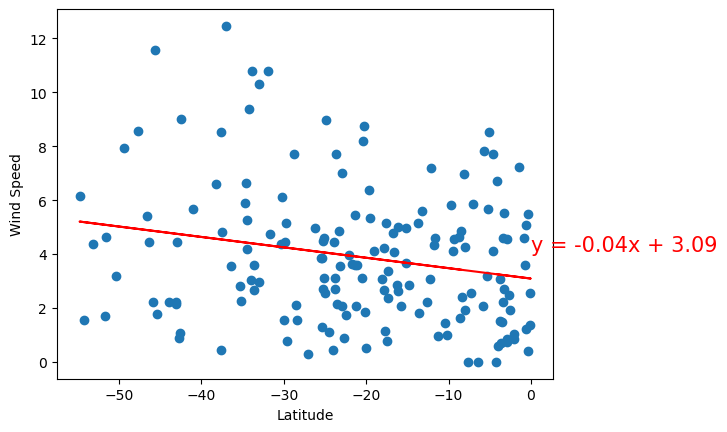

In [22]:
# Southern Hemisphere
plt.ylabel("Wind Speed")
lineplot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

**Discussion about the linear relationship:** There doesn't appear to be any correlation in either graph